<h1><center>Práctica 6</center></h1>
<h2><center>Morfología Binaria</center></h2>

In [3]:
#importamos librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import RGB2HSI

import copy

El objetivo de esta práctica es familiarizar al alumno con las herramientas básicas de análisis de
imagen, en concreto segmentación y morfología matemática para imágenes binarias.
Se trabajará con la imagen ‘Board_Recorte.tif’, imagen true color que acompaña al material de esta
práctica. El objetivo es aplicar herramientas de segmentación (utilizadas en la práctica 4) y
morfología matemática binaria para identificar de forma automática los chips del circuito impreso.

The objective of this exercise is to learn about the use of mathematicla morphology in image processing, specifically in binary images. We will be working with the image 'Board_Recorte.tif' a true color image. We will be using segmentation (from exercise 4) and mathematical morphology to identify the chips on the circuit shown in the image.

I. Transformación del espacio de representación

Utilice la instrucción imread para leer en MATLAB la imagen ‘Board_Recorte.tif’. Visualice la
imagen en color e identifique manualmente los 7 chips de mayor tamaño. Para seleccionar
manualmente los chips tenga en cuenta que todos deben compartir las mismas (o similares)
características.

**I. Transformation of the space** 

Read the image 'Board_Recorte.tif' and display the image, identify the 7 biggest chips on the circuit.

<IPython.core.display.Javascript object>


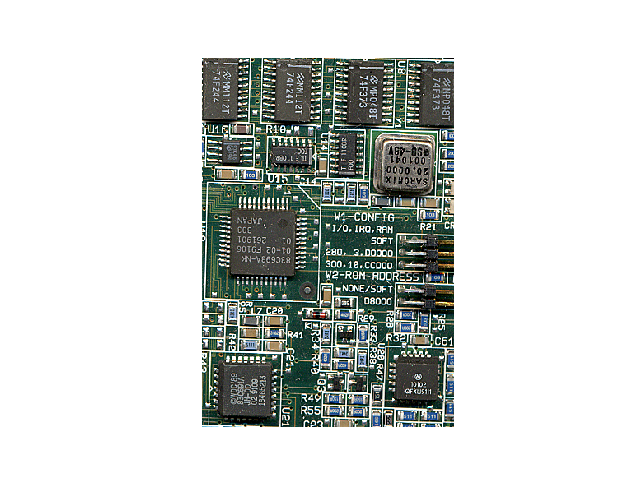

In [4]:
I = cv2.imread('Board_Recorte.tif')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)


%matplotlib notebook
plt.figure(1)
plt.imshow(I)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Visualice cada componente (R, G, B) e indique los comandos MATLAB utilizados. ¿Considera que
alguna de las componentes podría ser más relevante para segmentar la imagen y obtener únicamente
los 7 chips indicados anteriormente? Justifique su respuesta.

Separate the image by its color components (R, G, B) and display each component. Is any of the components more helpful when it comes to visually separating the chips?

<IPython.core.display.Javascript object>


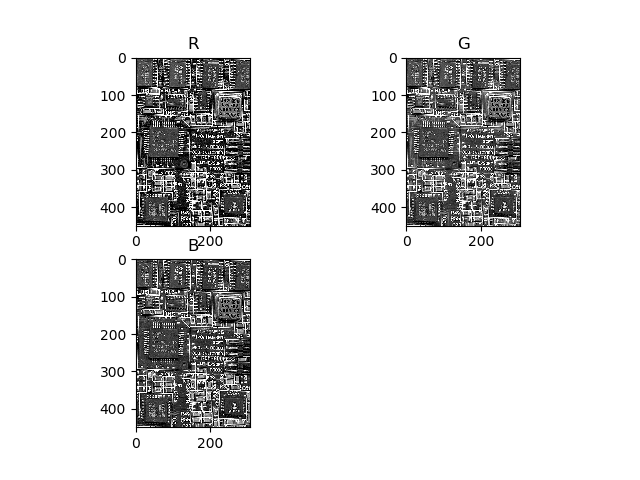

In [5]:
I_R,I_G,I_B = cv2.split(I)

plt.figure('Color components')
plt.subplot(2,2,1)
plt.title('R')
plt.imshow(I_R, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('G')
plt.imshow(I_G, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('B')
plt.imshow(I_B, cmap = 'gray')

plt.show()

np.savetxt('dataR.csv', I_R, delimiter=',')
np.savetxt('dataG.csv', I_G, delimiter=',')
np.savetxt('dataB.csv', I_B, delimiter=',')

Considere la transformación a otro espacio de representación, en concreto el espacio HSI. Utilice
para ello la función rgb2hsi proporcionada como material de la práctica. Utilice la ayuda de
MATLAB para obtener las componentes en el espacio transformado. Visualice cada componente e
indique qué rango de variación tiene cada una de las nuevas componentes. ¿Cómo ha determinado
el rango dinámico?.

RGB is not helpful when it comes to separating elements that are black, gray or white because this colors have the same value in all three components. Other spacdes to represent color are better for this, for example [HSI](https://www.blackice.com/colorspaceHSI.htm). Use the function RGB2HSI that comes with this exercise (it should appear in the first cell between the imported libraries), repressent each of the components (H, S, I) of this new image. Is any of the components more helpful when it comes to visually separating the chips?

float64


<IPython.core.display.Javascript object>


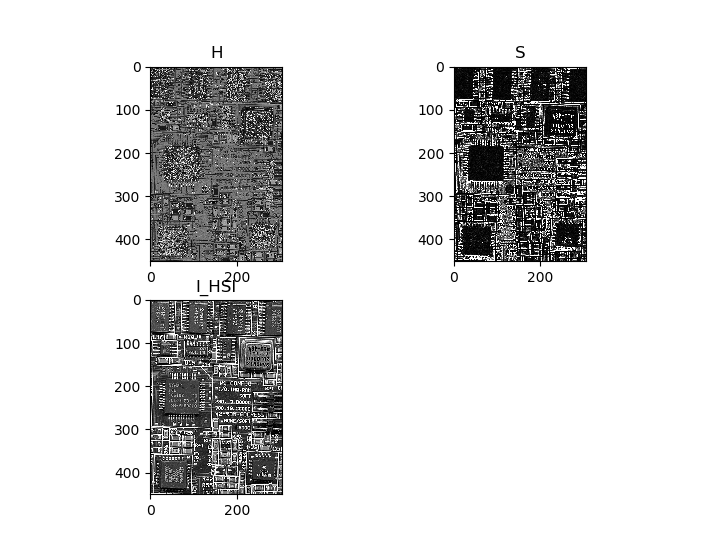

1.0
8.500000703293153e-10
0.9999999991499999


In [6]:
I_func = RGB2HSI.RGB2HSI(I)
I_H,I_S,I_I = cv2.split(I_func)

plt.figure('HSI components using function')
plt.subplot(2,2,1)
plt.title('H')
plt.imshow(I_H, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('S')
plt.imshow(I_S, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('I_HSI')
plt.imshow(I_I, cmap = 'gray')

plt.show()

RD_S = np.amax(I_S)-np.amin(I_S)

print( np.amax(I_S))
print(np.amin(I_S))
print(RD_S)
#RD_S=max(max(S))-min(min(S));
np.savetxt('dataS.csv', I_S, delimiter=',')

<IPython.core.display.Javascript object>


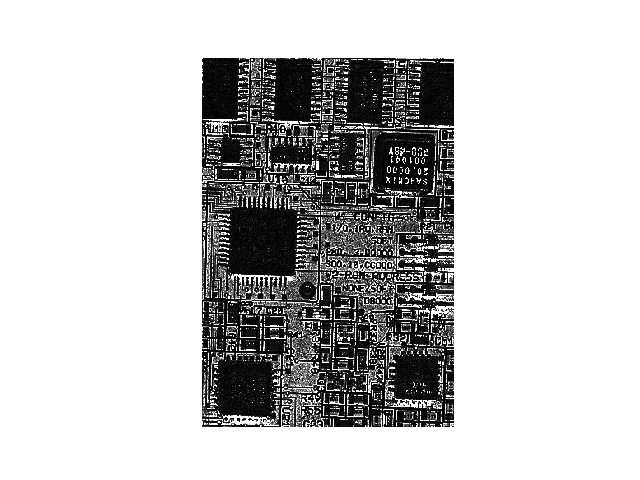

In [7]:
plt.figure('S')
plt.imshow(I_S, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


A partir de la visualización de las componentes de la imagen en el espacio transformado, elija
únicamente una componente (que denotaremos ‘Componente’) para continuar con el proceso de
extracción de los 7 chips de mayor tamaño. Justifique razonadamente su elección.


Choose one component (call this variable 'Component') to continue with the process of identifying the 7 chips. Look at the range and data type of this component, make sure it's an uint8 with values between 0 and 255, if that isn't the case do the necessary steps to transform it.

In [8]:
Component = I_S*255
Component = Component.astype('uint8')
print(Component.dtype)

uint8


II. Umbralización y filtrado
Observe el histograma de ‘Componente’. Puesto que no parece muy clara la elección de un valor
umbral a partir del histograma, utilizaremos la instrucción graythresh para obtener
automáticamente un valor umbral utilizando el método de Otsu. Haga uso de la ayuda de Matlab
para explicar qué criterio sigue el método de Otsu para determinar el umbral. ¿Qué valor umbral se
obtiene? Utilice ese valor umbral para umbralizar la imagen ‘Componente’. 
resultante para que la escala de variación sea [0,255] y convierta la variable resultante a una de tipo
uint8.

**II. Thresholding and filtering**

Display the histogram of 'Component'. Since there isn't a clear choice for the value of the threshold we will br using OTSU( as shown is exercise 1). Use the function threshold from opencv, make sure the resulting image is uint8 with a maximun value of 255. Display the resulting image.

<IPython.core.display.Javascript object>


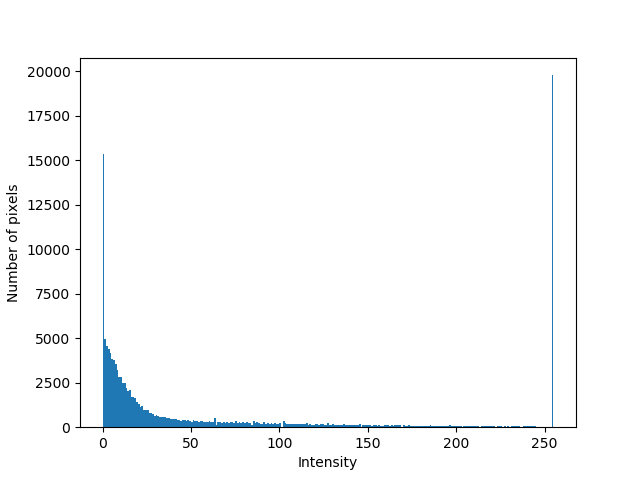

In [9]:
plt.figure('Component')
plt.hist(Component.ravel(),255,[0,255]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

125.0


<IPython.core.display.Javascript object>


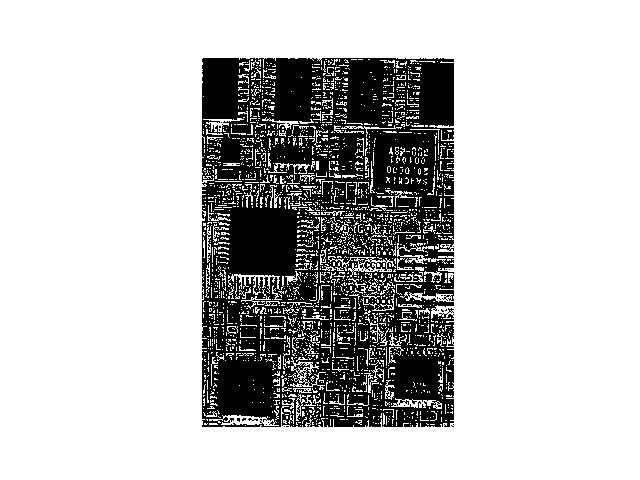

uint8


In [10]:
[thresh, Compthresh] = cv2.threshold(Component, 127, 255, cv2.THRESH_OTSU)
print(thresh)
plt.figure('S thresh')
plt.imshow(Compthresh, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

print(Compthresh.dtype)

Analice con detalle el resultado y justifique qué operador, relacionado con filtrado espacial y
utilizado en prácticas anteriores, se puede aplicar para homogeneizar la región interna de los chips
de modo que la imagen resultante siga siendo una imagen binaria tras la aplicación del filtro.
Aplique el operador considerando una máscara cuadrada de tamaño 5x5. Indique la instrucción
utilizada para realizar el filtrado y visualice la imagen filtrada, comentando las principales
diferencias (relacionadas con las regiones de los objetos de interés) con la imagen sin filtrar.

Analize the image and think of an spatial filter used in past exercises that could be used to clean the inside of the chips and that would maintain the binary values of the images. Use a 5X5 kernel for the filtering and display the resulting image.

<IPython.core.display.Javascript object>


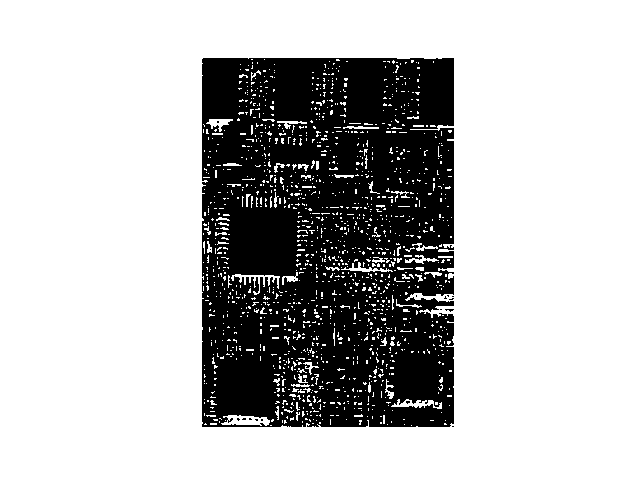

In [11]:
Cmedian = cv2.medianBlur(Compthresh, 3)

plt.figure('with median filter')
plt.imshow(Cmedian, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


III. Aplicación de operadores morfológicos
Como sabe, la aplicación de operadores morfológicos requiere la definición de un elemento
estructurante (EE), que en MATLAB se genera mediante la instrucción strel. Utilice la ayuda de
MATLAB para generar un EE cuadrado de lado 35 píxeles que almacenaremos en la variable
‘EE_cuadrado’.

**III. Using mathematical morphology**

Morphoplogical image processing is a series of non-linear operations related to the shape of the features in an image, more about [morphology](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm). All operations used in morpholgy need an structuring element which in our case is a numpy matrix of ones. Create an structuring element of size 35X35, call this variable 'EE'

In [12]:
EE = np.ones((35, 35),np.uint8)

Utilice ‘EE_cuadrado’ para aplicar sobre el resultado final de la etapa II los siguientes operadores
morfológicos:
- Erosión (instrucción imerode)
- Dilatación (instrucción imdilate)
- Apertura (instrucción imopen)
- Cierre (instrucción imclose)


Use 'EE' to apply the following morphological transformations. [Here](https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html) you can find a guide to the different morphological transformations in opencv.

- [Erosion](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)
- [Dilation](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)
- [Open](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)
- [Close](https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)

Display the resulting image of each of the operations. Keep in mind that soem will return a completely black imge.

<IPython.core.display.Javascript object>


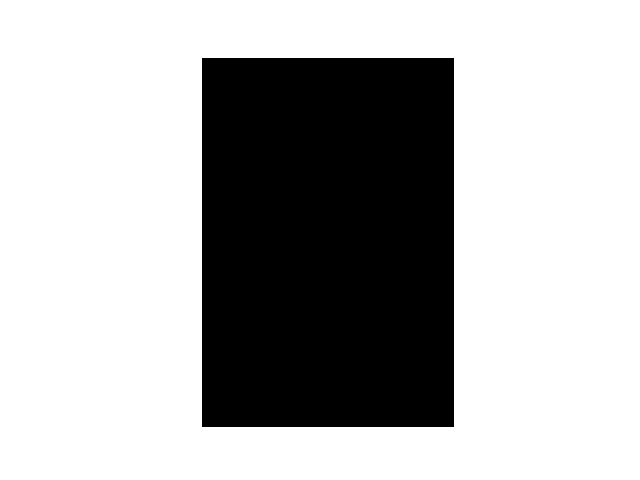

In [13]:
#Erosion

erosion = cv2.erode(Cmedian,EE,iterations = 1)

plt.figure('Erosion')
plt.imshow(erosion, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


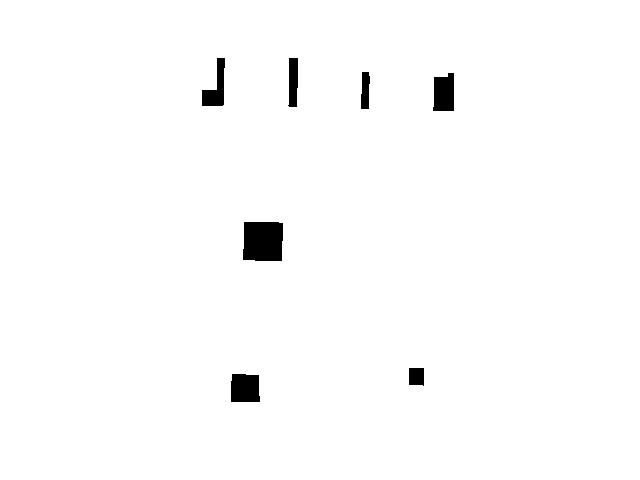

In [14]:
#Dilatacion

dilation = cv2.dilate(Cmedian,EE,iterations = 1)

plt.figure('Dilatacion')
plt.imshow(dilation, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


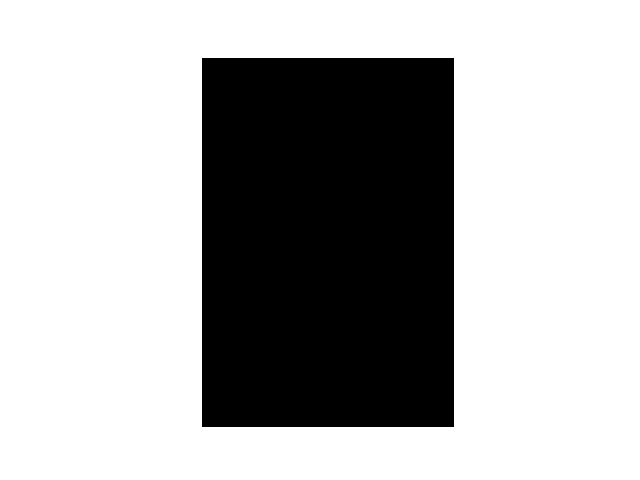

In [13]:
opening = cv2.morphologyEx(Cmedian, cv2.MORPH_OPEN, EE)

plt.figure('Open')
plt.imshow(opening, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


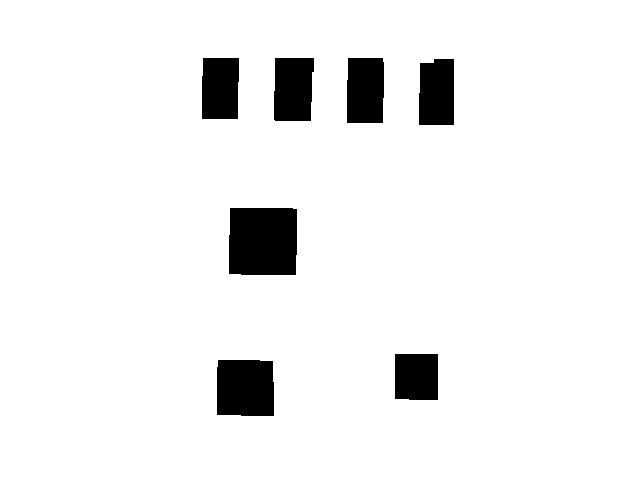

In [14]:
closing = cv2.morphologyEx(Cmedian, cv2.MORPH_CLOSE, EE)

plt.figure('Close')
plt.imshow(closing, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Visualice la imagen obtenida tras aplicar cada uno de los operadores anteriores y justifique
razonadamente el resultado teniendo en cuenta los contenidos presentados en las sesiones teóricas.
Justifique qué imagen (de las cuatro anteriores) se debe considerar para delimitar lo mejor posible
cada uno de los 7 chips seleccionados manualmente al inicio de la práctica. Denotaremos a la
variable que almacena esta imagen como ‘Im_Res_Morf


Looking at the images resulting from the different transformations, choose one that delimitates our 7 chips the best. This variable will be called 'Im_Res_Morf'. Bring the seven chips to the forefront( value 1) and make the rest of the image backgrond (value 0)

In [15]:
Im_Res_Morf = 255-closing

IV. Segmentación y caracterización de objetos
MATLAB proporciona la función bwlabel para realizar la segmentación de una imagen binaria.
Haga uso de la ayuda de esta función para indicar la vecindad considerada si se utiliza la siguiente
instrucción
IM_Seg = bwlabel(Im_Res_Morf);
Utilice la instrucción anterior para segmentar la imagen ‘Im_Res_Morf’. La capa de segmentación
(almacenada en la variable IM_Seg) se puede visualizar con las instrucciones
RGB_Segment = label2rgb(IM_Seg);
figure, imshow(RGB_Segment)
¿Cuántos objetos se obtienen como resultado de la segmentación? En este caso el número de
objetos es muy reducido y se puede contabilizar teniendo en cuenta el número de colores (recuerde
que cada color identifica un objeto diferente). Para obtener el número de objetos mediante una única
instrucción se puede utilizar la siguiente expresión en línea de comandos:

**IV. Segmentation of objects**

For the segmentation of 'Im_Res_morf' we will be using the function cv2.connectedComponentsWithStats() from exercise 4. Name the labeled image IM_seg and display it using the colormap plt.cm.get_cmap('nipy_spectral'). Doues the number of objects correspond with the number of chips? (Keep in mind that the function used counts the background as an object).

<IPython.core.display.Javascript object>


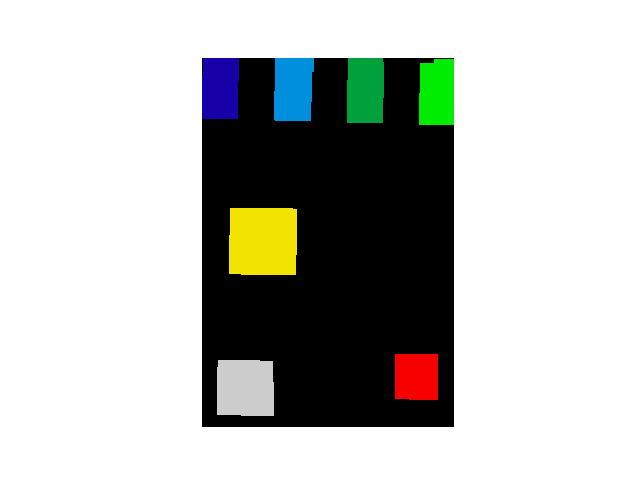

In [16]:
Nobjects, IM_Seg, stats, centroids=cv2.connectedComponentsWithStats(Im_Res_Morf)

plt.figure('Segmented image')
plt.imshow(IM_Seg, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Realice alguna modificación sobre la imagen binaria a segmentar para que, cuando se realice la
segmentación binaria, el número de objetos segmentados sea 7. Incluya en la memoria la secuencia
de instrucciones utilizada, junto con la capa de segmentación resultante. 

Para determinar el número de chips con forma cuadrada y forma rectangular se puede recurrir a
examinar las propiedades de los objetos segmentados mediante la función regionprops. La
función regionprops toma como uno de los argumentos de entrada la capa de etiquetas obtenida de
la segmentación (variable IM_Seg), y como otro argumento la característica de los objetos que se
desea conocer. En esta práctica consideraremos la propiedad de excentricidad ('Eccentricity'),
relacionada con la forma de las regiones. 

Haga uso de la ayuda de MATLAB para explicar qué representa esta característica
('Eccentricity') desde el punto de vista geométrico, y qué valores son esperables (altos o bajos)
para cada una de las regiones segmentadas, teniendo en cuenta la etiqueta de cada región. Para
obtener visualmente la etiqueta de cada región haga uso de la función imview como
imview(IM_Seg,[])
y pase el cursor del ratón sobre la región cuyo número de etiqueta desea conocer. El valor de la
etiqueta aparece en la esquina inferior izquierda, justo tras las coordenadas del píxel sobre el que se
sitúa el ratón.
Tras identificar la etiqueta de cada región indique, para cada etiqueta, la excentricidad asociada con
el objeto que ésta representa. Para obtener la excentricidad del objeto con etiqueta et (et es un valor
entero positivo) utilice la instrucción
Props = regionprops(IM_Seg, 'Eccentricity')
Props(et).Eccentricity

En base a esta información, indique qué procedimiento seguiría para separar los chips
rectangulares de los cuadrados. Justifique su respuesta.

La función equivalente en Python no da el Sts de 'eccentricity' pero si que da la maxima altura y el ancho máximo de cada etiqueta, por lo que podemos sacar los elementos cuadrados a partir de esos datos

https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f

https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gac7099124c0390051c6970a987e7dc5c5

https://docs.python.org/2/library/copy.html

**V. Squares and rectangles**

Looking at the original image we can see that our seven chips can be divided in two groups squares and rectangles. We will be using the stats given by the function cv2.connectedComponentsWithStats() to separate this two groups.
First create two empty list one called square the other rectangle. 
To differentiate the squares from the rectangles we will subtract the maximun width  from the maximun heigh of each object, this two values are given as stats by the function used for the segmentation. The absolute value of this operation will be lower in the squares.

Hint: Use a for loop, and the Number of objects given by the function. Keep in mind that the background is counted as an object but shouldn't be classified as a rectangle chip.

In [17]:

square = []
rectangle = []

for i in range(1, Nobjects):
    ecce = abs(stats[i, cv2.CC_STAT_WIDTH] - stats[i, cv2.CC_STAT_HEIGHT])
    
    if ecce < 10:
        square.append(i)
    else:
        rectangle.append(i)
        
print(square)
print(rectangle)

[5, 6, 7]
[1, 2, 3, 4]


Now you should have two arrays with tag numbers separated in squares and rectangles. Create two new images as [deepcopys](https://docs.python.org/2/library/copy.html) of IM_Seg, one called 'Only_square' and the other 'Only_rect'. 
'Only_square' must be a binary image that contains only the square chips and viceversa for 'Only_Rect'. 

<IPython.core.display.Javascript object>


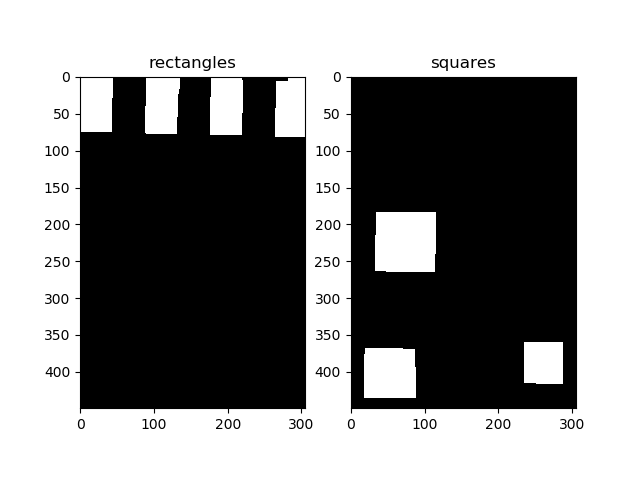

In [18]:
# only rectangles

h, w = IM_Seg.shape

Only_rect = copy.deepcopy(IM_Seg)
Only_square = copy.deepcopy(IM_Seg)

for i in range(0, h):
    for j in range(0, w):
        x = IM_Seg[i,j]

        if x in rectangle:
            Only_rect[i,j] = 1
        else:
            Only_rect[i,j] = 0

        if x in square:
            Only_square[i,j] = 1
        else:
            Only_square[i,j] = 0
                
plt.figure('rectangles and squares')
plt.subplot(1,2,1)
plt.title('rectangles')
plt.imshow(Only_rect, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('squares')
plt.imshow(Only_square, cmap = 'gray')

plt.show()


Las técnicas de morfología matemática también se pueden utilizar para delimitar las fronteras de los
objetos. Explique razonadamente cómo obtener los contornos (finos) de los chips utilizando
únicamente un elemento estructurante, dos operadores morfológicos y un operador aritmético punto
a punto. Indique también la secuencia de instrucciones y la imagen resultante del proceso. Tenga en
cuenta que la imagen de partida es la imagen binaria cuya segmentación ha proporcionado 7
objetos.
Explique la influencia del tamaño y forma del EE

5. Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc


**VI. Morphological gradient**

Mathematical morphology can also be used to get the broders of objects. This is called the morphological gradient which is the difference between the dilation and erosion of an image. We will be acting over the image we used for the segmetation (Im_Res_Morf) with a new structural element. opencv has a [funtion](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) to create structural elements of specific shapes. For this we will use and ellipse of size 5X5 which makes a circular structural element.
To do the gradient we could do both the dilation and erosion and then subtract them or we could use cv2.morphologyEx() with the parameter cv2.MORPH_GRADIENT. Display the resulting image.

<IPython.core.display.Javascript object>


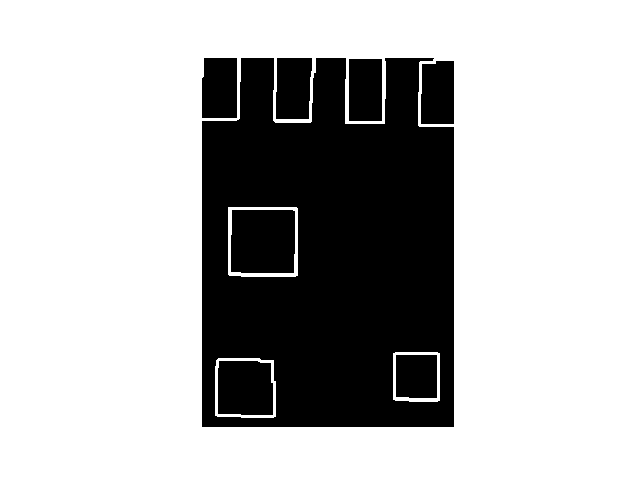